In [24]:
import urllib.request
import csv

def get_user_info():
    name = input("Enter your name: ")
    language = input("Enter the language you want to learn (German, French, English): ")
    proficiency = input("Enter your proficiency level (Beginner, Intermediate, Advanced): ")
    past_experience = input("Have you ever learned this language before? (yes/no): ")
    study_time = float(input("How much time are you willing to devote to learning this language per day (in hours)?: "))
    return name, language, proficiency, past_experience, study_time

def classify_user(proficiency, past_experience, study_time):
    score = 0
    if proficiency.lower() == "beginner":
        score += 1
    elif proficiency.lower() == "intermediate":
        score += 2
    elif proficiency.lower() == "advanced":
        score += 3
    
    if past_experience.lower() == "yes":
        score += 1
    
    if study_time >= 2:
        score += 1
    if study_time >= 4:
        score += 1
    
    if score <= 3:
        return "Basic"
    elif score <= 5:
        return "Intermediate"
    else:
        return "Advanced"

def fetch_resources(language_level):
    # Here you would define functions to fetch resources based on the language level
    # For demonstration purposes, I'll simply return sample data
    
    # Example resources for each level
    basic_resources = {
        "videos": ["Basic French for Beginners", "Introduction to French Pronunciation"],
        "exercises": ["Basic French Vocabulary Quiz", "Simple French Sentences Practice"],
        "roadmap": ["Week 1: Alphabet and Greetings", "Week 2: Numbers and Common Phrases"]
    }
    
    intermediate_resources = {
        "videos": ["Intermediate French Grammar Series", "Conversational French Practice"],
        "exercises": ["Intermediate French Listening Comprehension", "French Writing Exercises"],
        "roadmap": ["Week 1: Verb Tenses Review", "Week 2: Intermediate Vocabulary Building"]
    }
    
    advanced_resources = {
        "videos": ["Advanced French Literature Analysis", "French News Listening Practice"],
        "exercises": ["Advanced French Grammar Drills", "French Debate Topics"],
        "roadmap": ["Week 1: Advanced Vocabulary Expansion", "Week 2: Advanced Speaking and Writing Practice"]
    }
    
    if language_level == "Basic":
        return basic_resources
    elif language_level == "Intermediate":
        return intermediate_resources
    elif language_level == "Advanced":
        return advanced_resources

def download_pdf(language_level):
    if language_level == "Basic":
        source_file = "Beginner.pdf"
        destination_file = "Beginner.pdf"
    elif language_level == "Intermediate":
        source_file = "Intermediate.pdf"
        destination_file = "Intermediate.pdf"
    elif language_level == "Advanced":
        source_file = "Advanced.pdf"
        destination_file = "Advanced.pdf"
        
    print(f"Copying {source_file} to {destination_file}...")
    # Code to copy or download the PDF file
    print("Copy complete!")

def create_csv_file():
    if not os.path.exists('user_info.csv'):
        with open('user_info.csv', mode='w', newline='') as file:
            writer = csv.writer(file)
            writer.writerow(['Name', 'Language', 'Proficiency', 'Past Experience', 'Study Time (hours)'])


def main():
    name, language, proficiency, past_experience, study_time = get_user_info()
    language_level = classify_user(proficiency, past_experience, study_time)
    
    print(f"Hello {name}! Based on your input, your language level is: {language_level}")
    
    # Fetch resources based on the user's language level
    resources = fetch_resources(language_level)
    
    print("\nHere are some resources tailored to your language level:")
    print("Videos:")
    print(resources["videos"])
    print("\nExercises:")
    print(resources["exercises"])
    print("\nRoadmap:")
    print(resources["roadmap"])
    
    # Download PDF based on language level
    download_pdf(language_level)
    def store_user_info(name, language, proficiency, past_experience, study_time):
      with open('user_info.csv', mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([name, language, proficiency, past_experience, study_time])
    # Store user info in CSV file
    store_user_info(name, language, proficiency, past_experience, study_time)

if __name__ == "__main__":
    main()


Hello Ankush! Based on your input, your language level is: Basic

Here are some resources tailored to your language level:
Videos:
['Basic French for Beginners', 'Introduction to French Pronunciation']

Exercises:
['Basic French Vocabulary Quiz', 'Simple French Sentences Practice']

Roadmap:
['Week 1: Alphabet and Greetings', 'Week 2: Numbers and Common Phrases']
Copying Beginner.pdf to Beginner.pdf...
Copy complete!


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Load the Data
data = pd.read_csv('user_info.csv')

# Step 2: Preprocess the Data
# Convert categorical variables into numerical values using one-hot encoding
data = pd.get_dummies(data, columns=['Language', 'Level', 'Proficiency'])

# Split data into features (X) and target variable (y)
X = data.drop(['Name', 'Time devoted'], axis=1)
y = data['Time devoted']

# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Choose a Regression Model
model = LinearRegression()

# Step 5: Train the Model
model.fit(X_train, y_train)

# Step 6: Evaluate the Model
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) as the evaluation metric
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Step 7: Make Predictions (if required)
# You can make predictions for new data using model.predict()


Mean Squared Error: 4.062500000000002


In [26]:
feature_importance = pd.Series(model.coef_, index=X.columns)
feature_importance = feature_importance.abs().sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)


Feature Importance:
Level_Advanced        1.083333
Level_Intermediate    0.666667
Level_Beginner        0.416667
Proficiency_yes       0.250000
Proficiency_no        0.250000
Language_French       0.000000
dtype: float64


In [27]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("Coefficients:")
print(coefficients)


Coefficients:
              Feature  Coefficient
0     Language_French     0.000000
1      Level_Advanced    -1.083333
2      Level_Beginner     0.416667
3  Level_Intermediate     0.666667
4      Proficiency_no     0.250000
5     Proficiency_yes    -0.250000


In [28]:
print(data.columns)




Index(['Name', 'Time devoted', 'Language_French', 'Level_Advanced',
       'Level_Beginner', 'Level_Intermediate', 'Proficiency_no',
       'Proficiency_yes'],
      dtype='object')


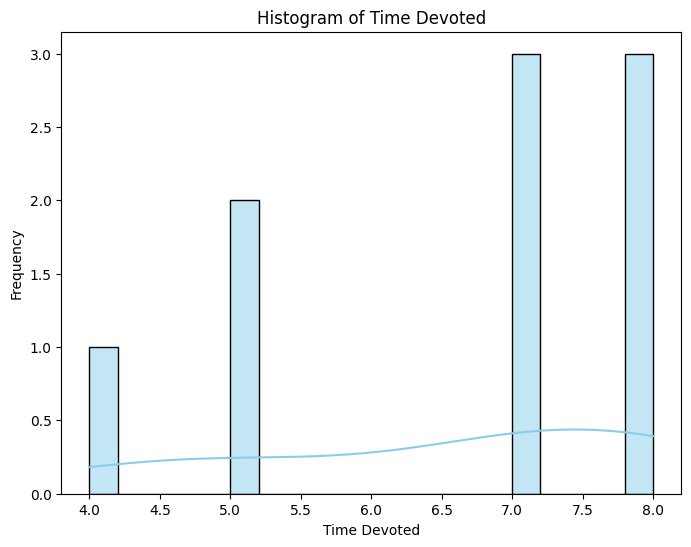

In [29]:
# Histogram of 'Time devoted'
plt.figure(figsize=(8, 6))
sns.histplot(data['Time devoted'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Time Devoted')
plt.xlabel('Time Devoted')
plt.ylabel('Frequency')
plt.show()


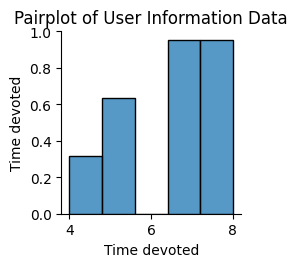

Index(['Name', 'Language', 'Level', 'Proficiency', 'Time devoted'], dtype='object')


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('user_info.csv')

# Drop non-numeric columns for pairplot
numeric_data = data.drop(['Name', 'Language', 'Proficiency'], axis=1)

# Create pairplot
sns.pairplot(numeric_data)
plt.title('Pairplot of User Information Data')
plt.show()
print(data.columns)


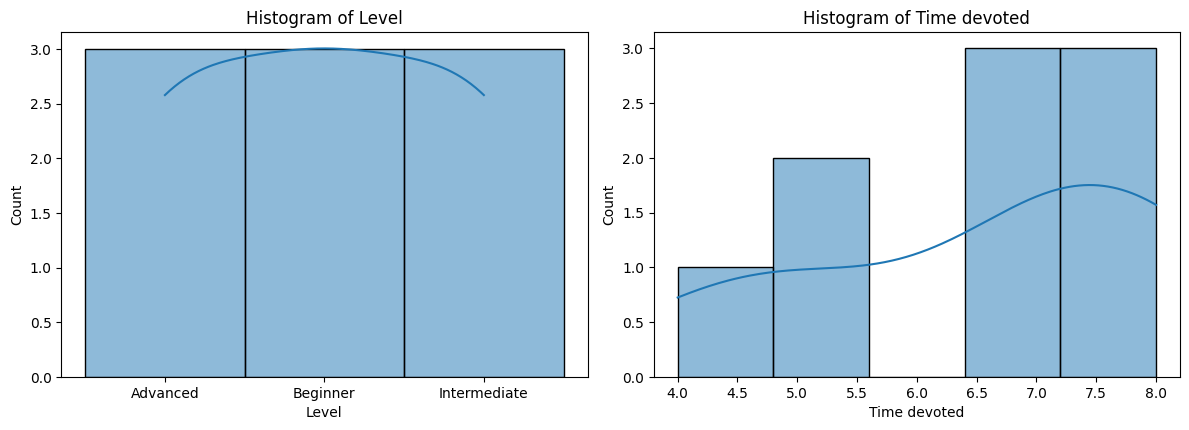

In [31]:
# Create histograms for each numerical variable
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_data.columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()


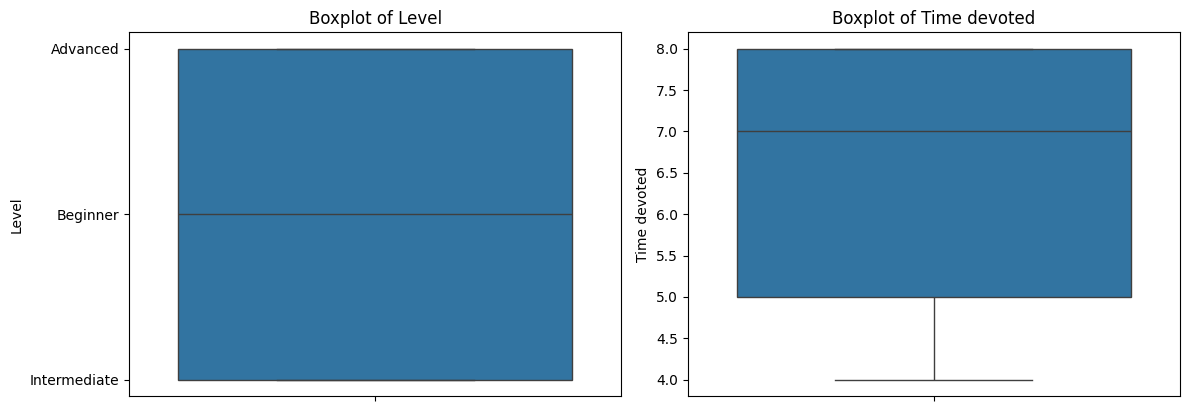

In [32]:
# Create boxplots for each numerical variable
plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_data.columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


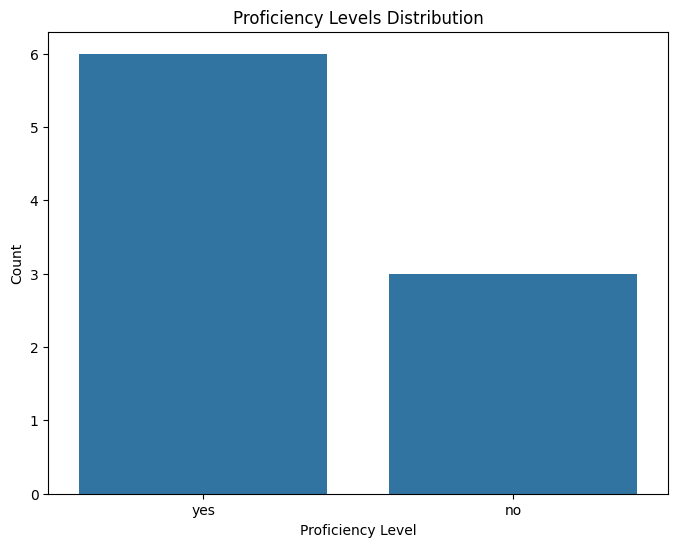

In [33]:
# Count the occurrences of each proficiency level
proficiency_counts = data['Proficiency'].value_counts()

# Plot bar plot of proficiency levels
plt.figure(figsize=(8, 6))
sns.barplot(x=proficiency_counts.index, y=proficiency_counts.values)
plt.title('Proficiency Levels Distribution')
plt.xlabel('Proficiency Level')
plt.ylabel('Count')
plt.show()


<Figure size 1200x1000 with 0 Axes>

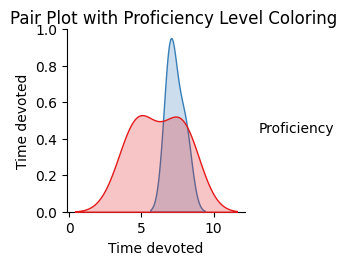

In [34]:
# Create pair plot with proficiency level coloring
plt.figure(figsize=(12, 10))
sns.pairplot(data, hue='Proficiency', palette='Set1')
plt.suptitle('Pair Plot with Proficiency Level Coloring', y=1.02)
plt.show()


In [35]:
import os
os.environ['GRADIENT_WORKSPACE_ID']='3059fa02-d742-4ab0-b8c3-6e50155ef7b5_workspace'
os.environ['GRADIENT_ACCESS_TOKEN']='SmjCNMruqooFvwT1tveG3V88ei3v5fGo'

In [37]:
import pandas as pd
from gradientai import Gradient

# Initialize Gradient
gradient = Gradient()

# Function to generate questions and append them to an existing CSV file
def generate_questions(prompt, language, level):
    # Create a new model adapter
    new_model_adapter = gradient.get_base_model(base_model_slug="nous-hermes2").create_model_adapter(
        name=f"{language}_{level}_model"
    )

    # Define samples for fine-tuning
    samples = [
        {"inputs": f"### Instruction: Generate beginner level questions related to {language} language learning. \n\n### Response: "},
        {"inputs": f"### Instruction: Generate intermediate level questions related to {language} language learning. \n\n### Response: "},
        {"inputs": f"### Instruction: Generate advanced level questions related to {language} language learning. \n\n### Response: "}
    ]

    # Fine-tune the model
    num_epochs = 3
    for epoch in range(num_epochs):
        print(f"Fine-tuning the model for epoch {epoch + 1}")
        new_model_adapter.fine_tune(samples=samples)

    # Initialize an empty DataFrame to store new questions
    new_questions_df = pd.DataFrame(columns=['Question', 'Level', 'Solution'])

    # Generate questions along with answers
    for i in range(10):  # Generate 10 questions
        sample_query = f"### Instruction: Generate {level} level questions related to {language} language learning. \n\n### Response:"
        completion = new_model_adapter.complete(query=sample_query, max_generated_token_count=100).generated_output
        question = completion.split("###")[0].strip()
        new_questions_df = new_questions_df._append({'Question': question, 'Level': level.capitalize(), 'Solution': ''}, ignore_index=True)

    # Read existing questions from the file
    file_name = 'questions.csv'
    existing_questions_df = pd.read_csv(file_name)

    # Append new questions to the existing DataFrame
    updated_questions_df = existing_questions_df._append(new_questions_df, ignore_index=True)

    # Save updated questions to CSV file
    updated_questions_df.to_csv(file_name, index=False)
    print(f"Questions generated for {language} - {level} level and appended to {file_name}")

# Define prompts for each level and language combination
prompts = {
    'beginner_french': "Generate beginner level questions related to French language learning.",
    'intermediate_french': "Generate intermediate level questions related to French language learning.",
    'advanced_french': "Generate advanced level questions related to French language learning.",
    # Add prompts for other languages and levels
}

# Generate and append questions for each prompt
for key, prompt in prompts.items():
    language, level = key.split('_')
    generate_questions(prompt, language, level)

Fine-tuning the model for epoch 1
Fine-tuning the model for epoch 2
Fine-tuning the model for epoch 3
Questions generated for beginner - french level and appended to questions.csv
Fine-tuning the model for epoch 1
Fine-tuning the model for epoch 2
Fine-tuning the model for epoch 3
Questions generated for intermediate - french level and appended to questions.csv
Fine-tuning the model for epoch 1
Fine-tuning the model for epoch 2
Fine-tuning the model for epoch 3
Questions generated for advanced - french level and appended to questions.csv
